# Prepare associations

In [1]:
import pandas as pd
import numpy as np

assoc_net2 = pd.read_excel(
    'assoc_net2.xlsx', sheet_name=1
)[[
    'Source', 'Target', 'Weight'
]].astype(
    {'Source': 'str', 'Target': 'str', 'Weight': 'int64'}
)
assoc_net2.head()

,Source,Target,Weight
0,абзац,текст,10
1,абзац,книга,6
2,абзац,красная строка,6
3,абзац,полный,5
4,абзац,в книге,4


## - drop duplicates

In [2]:
edges = assoc_net2.apply(lambda row: (row.Source, row.Target, row.Weight), axis=1).tolist()
sorted(list(zip(*np.unique(
    edges, axis=0, return_counts=True
)[::-1])), key=lambda t: -t[0])[:10]

[(4, array(['раз', 'Штирлиц', '1'], dtype='<U34')),
 (4, array(['раз', 'встретить', '1'], dtype='<U34')),
 (4, array(['раз', 'громко', '1'], dtype='<U34')),
 (4, array(['раз', 'дать', '1'], dtype='<U34')),
 (4, array(['раз', 'два', '50'], dtype='<U34')),
 (4, array(['раз', 'два подъема', '1'], dtype='<U34')),
 (4, array(['раз', 'два...', '2'], dtype='<U34')),
 (4, array(['раз', 'два= взяли', '2'], dtype='<U34')),
 (4, array(['раз', 'два= три', '2'], dtype='<U34')),
 (4, array(['раз', 'десять', '1'], dtype='<U34'))]

In [3]:
assoc_net2.drop_duplicates(inplace=True)

## - make source&target lower

In [4]:
notlowset = set(
    assoc_net2[assoc_net2.Source.str.lower() != assoc_net2.Source].Source.str.lower()
)&set(
    assoc_net2.Source
)
notlowset

{'бах', 'горький', 'грозный', 'иванов', 'ленин', 'по', 'сухой', 'то', 'черный'}

In [5]:
df = assoc_net2[assoc_net2.apply(lambda row: row.Source.lower() in notlowset, axis=1)]
df_pairs = df.apply(lambda row: (row.Source.lower(), row.Target), axis=1).tolist()

sorted(list(zip(*np.unique(
    df_pairs, axis=0, return_counts=True
)[::-1])), key=lambda t: t[0])

[(2, array(['бах', "Gans'n Rouses"], dtype='<U32')),
 (2, array(['бах', 'Бетховен'], dtype='<U32')),
 (2, array(['бах', 'Иоганн'], dtype='<U32')),
 (2, array(['бах', 'Иоганн Себастьян'], dtype='<U32')),
 (2, array(['бах', 'Моцарт'], dtype='<U32')),
 (2, array(['бах', 'Себастьян'], dtype='<U32')),
 (2, array(['бах', 'абракадабра'], dtype='<U32')),
 (2, array(['бах', 'бабах'], dtype='<U32')),
 (2, array(['бах', 'бултых'], dtype='<U32')),
 (2, array(['бах', 'бум'], dtype='<U32')),
 (2, array(['бах', 'бум!!!'], dtype='<U32')),
 (2, array(['бах', 'бух'], dtype='<U32')),
 (2, array(['бах', 'великий'], dtype='<U32')),
 (2, array(['бах', 'взрыв'], dtype='<U32')),
 (2, array(['бах', 'выдох'], dtype='<U32')),
 (2, array(['бах', 'выстрел'], dtype='<U32')),
 (2, array(['бах', 'для органа'], dtype='<U32')),
 (2, array(['бах', 'занудство'], dtype='<U32')),
 (2, array(['бах', 'звук'], dtype='<U32')),
 (2, array(['бах', 'известный композитор'], dtype='<U32')),
 (2, array(['бах', 'классика'], dtype='<U

In [6]:
assoc_net2['Source'] = assoc_net2.Source.str.lower()
assoc_net2.drop_duplicates(inplace=True)

In [7]:
edges = assoc_net2.apply(lambda row: (row.Source, row.Target.lower()), axis=1).tolist()
sorted(list(zip(*np.unique(
    edges, axis=0, return_counts=True
)[::-1])), key=lambda t: -t[0])[:10]

[(2, array(['подлый', 'трус'], dtype='<U34')),
 (2, array(['физик', 'умный'], dtype='<U34')),
 (1, array(['абзац', '1-й'], dtype='<U34')),
 (1, array(['абзац', 'в книге'], dtype='<U34')),
 (1, array(['абзац', 'второй'], dtype='<U34')),
 (1, array(['абзац', 'день'], dtype='<U34')),
 (1, array(['абзац', 'заглавная буква'], dtype='<U34')),
 (1, array(['абзац', 'заголовок'], dtype='<U34')),
 (1, array(['абзац', 'закончен'], dtype='<U34')),
 (1, array(['абзац', 'закончился'], dtype='<U34'))]

In [8]:
display(assoc_net2[(assoc_net2.Source == 'подлый') & (assoc_net2.Target.str.lower() == 'трус')])
display(assoc_net2[(assoc_net2.Source == 'физик') & (assoc_net2.Target.str.lower() == 'умный')])

,Source,Target,Weight
236753,подлый,трус,57
236827,подлый,трус,1


,Source,Target,Weight
374574,физик,умный,5
374619,физик,умный,1


In [9]:
assoc_net2['Target'] = assoc_net2.Target.str.lower()

In [10]:
SOURCES = set(assoc_net2.Source)

## - split target

In [11]:
import re

assoc_net2['Target words'] = assoc_net2.Target.apply(lambda w: re.findall('[\w-]+', w))

In [12]:
sum(assoc_net2['Target words'].apply(len) > 1)/sum(assoc_net2['Target words'].apply(len) >= 1)

0.1645323032877677

In [13]:
len(set(assoc_net2['Target']))/len(SOURCES)

16.687779433681072

## pymorphy help

In [14]:
import pymorphy2
# useful links:
# https://pymorphy2.readthedocs.io/en/latest/user/guide.html
# https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html#russian-genders
# http://opencorpora.org/dict.php?act=gram
# help(pymorphy2.MorphAnalyzer().TagClass)

In [15]:
morph_analyzer = pymorphy2.MorphAnalyzer()
meaningful_tags = {'ANIMACY' : '.animacy(), одушевленность',
                   'ASPECTS' : '.aspect(), вид (совершенный или несовершенный)',
                   'CASES' : '.case(), падеж',
                   'GENDERS' : '.gender(), род (мужской, женский, средний)',
                   'INVOLVEMENT' : '.involvement(), включенность говорящего в действие',
                   'MOODS' : '.mood(), наклонение (повелительное, изъявительное)',
                   'NUMBERS' : '.number(), число (единственное, множественное)',
                   'PARTS_OF_SPEECH' : '.POS(), часть речи',
                   'PERSONS' : '.person(), лицо (1, 2, 3)',
                   'TENSES' : '.tense(), время (настоящее, прошедшее, будущее)',
                   'TRANSITIVITY' : '.transitivity(), переходность (переходный, непереходный)',
                   'VOICES' : 'voice, залог (действительный, страдательный)'}
pos_lat_tags = lambda tag: list(morph_analyzer.TagClass.__dict__[tag])
pos_cyr_tags = lambda tag: [morph_analyzer.lat2cyr(t) for t in pos_lat_tags(tag)]
print('\n\n'.join(['{} - {}:\n{}'.format(tag, desc, list(zip(pos_lat_tags(tag), pos_cyr_tags(tag))))
                   for tag, desc in meaningful_tags.items()]))

INVOLVEMENT - .involvement(), включенность говорящего в действие:
[('incl', 'вкл'), ('excl', 'выкл')]

PARTS_OF_SPEECH - .POS(), часть речи:
[('PREP', 'ПР'), ('ADJF', 'ПРИЛ'), ('VERB', 'ГЛ'), ('PRTS', 'КР_ПРИЧ'), ('COMP', 'КОМП'), ('PRED', 'ПРЕДК'), ('NOUN', 'СУЩ'), ('INFN', 'ИНФ'), ('ADVB', 'Н'), ('CONJ', 'СОЮЗ'), ('ADJS', 'КР_ПРИЛ'), ('PRCL', 'ЧАСТ'), ('NPRO', 'МС'), ('INTJ', 'МЕЖД'), ('GRND', 'ДЕЕПР'), ('PRTF', 'ПРИЧ'), ('NUMR', 'ЧИСЛ')]

VOICES - voice, залог (действительный, страдательный):
[('pssv', 'страд'), ('actv', 'действ')]

CASES - .case(), падеж:
[('gen2', 'рд2'), ('loc2', 'пр2'), ('ablt', 'тв'), ('loct', 'пр'), ('gen1', 'рд1'), ('gent', 'рд'), ('loc1', 'пр1'), ('accs', 'вн'), ('datv', 'дт'), ('nomn', 'им'), ('voct', 'зв'), ('acc2', 'вн2')]

PERSONS - .person(), лицо (1, 2, 3):
[('2per', '2л'), ('3per', '3л'), ('1per', '1л')]

TENSES - .tense(), время (настоящее, прошедшее, будущее):
[('futr', 'буд'), ('pres', 'наст'), ('past', 'прош')]

MOODS - .mood(), наклонение (повели

## - get source&target words normal forms

In [16]:
get_nfs = lambda word: set(p.normal_form.replace('ё', 'е') for p in morph_analyzer.parse(word))
get_nf_pos = lambda word: {(p.normal_form.replace('ё', 'е'), p.tag.POS) for p in morph_analyzer.parse(word)}

# Ё case
# display(set([s for s in SOURCES if 'ё' in s]), set([s for s in assoc_net2['Target'] if 'ё' in s]))

# not normal sources
sources_not_nf = [
    (morph_analyzer.parse(s)[0].tag, s, set(list(zip(*list(nf_pos)))[0])&SOURCES)
    for s, nf_pos in list(map(lambda s: (s, get_nf_pos(s)), SOURCES))
    if s not in list(zip(*list(nf_pos)))[0]
]
for tag, s, nf_in_s in sorted(sources_not_nf):
    print('{}\t{}\tnormal forms in SOURCES: {}\n'.format(str(tag), s, nf_in_s))

ADJF,Anum inan,masc,sing,accs	четвертый	normal forms in SOURCES: {'четыре'}

ADJF,Anum masc,sing,nomn	второй	normal forms in SOURCES: {'два'}

ADJF,Anum masc,sing,nomn	десятый	normal forms in SOURCES: {'десять'}

ADJF,Anum masc,sing,nomn	первый	normal forms in SOURCES: {'один'}

ADJF,Anum masc,sing,nomn	пятый	normal forms in SOURCES: {'пять'}

ADJF,Anum masc,sing,nomn	семнадцатый	normal forms in SOURCES: set()

ADJF,Anum masc,sing,nomn	третий	normal forms in SOURCES: {'три'}

ADJF,Anum masc,sing,nomn	шестой	normal forms in SOURCES: {'шесть'}

ADJF,Apro,Anph neut,sing,accs	свое	normal forms in SOURCES: {'свой'}

ADJF,Qual femn,sing,nomn	скорая	normal forms in SOURCES: {'скорый'}

ADJF,Subx,Qual femn,sing,nomn	больная	normal forms in SOURCES: {'больной'}

ADJF,Subx,Qual femn,sing,nomn	любимая	normal forms in SOURCES: {'любить', 'любимый'}

ADJF,Subx,Qual femn,sing,nomn	святая	normal forms in SOURCES: {'святой'}

ADJF,Supr,Qual masc,sing,nomn	важнейший	normal forms in SOURCES: {'важный'}


In [17]:
for _, s, nf_in_s in sorted(sources_not_nf):
    if not nf_in_s:
        print(s, get_nfs(s))

семнадцатый {'семнадцать'}
контрольная {'контрольный'}
былое {'былой'}
здраво {'здравый'}
должен {'должный'}
постигнуть {'постичь'}
деньги {'деньга'}
оковы {'окова'}
сопли {'сопля'}
доспехи {'доспех'}
пересуды {'пересуд'}
заведующий {'заведовать'}
газированный {'газировать'}
полированный {'полировать'}
захватывающий {'захватывать'}
потрясающий {'потрясать'}
разомкнутый {'разомкнуть'}
раскаленный {'раскалить'}


In [18]:
ADD_SOURCES_NF_DICT = {s: list(get_nfs(s))[0] for _, s, nf_in_s in sorted(sources_not_nf) if not nf_in_s}
ADD_SOURCES_NF_DICT

{'былое': 'былой',
 'газированный': 'газировать',
 'деньги': 'деньга',
 'должен': 'должный',
 'доспехи': 'доспех',
 'заведующий': 'заведовать',
 'захватывающий': 'захватывать',
 'здраво': 'здравый',
 'контрольная': 'контрольный',
 'оковы': 'окова',
 'пересуды': 'пересуд',
 'полированный': 'полировать',
 'постигнуть': 'постичь',
 'потрясающий': 'потрясать',
 'разомкнутый': 'разомкнуть',
 'раскаленный': 'раскалить',
 'семнадцатый': 'семнадцать',
 'сопли': 'сопля'}

In [19]:
SOURCES_POSES = dict(map(lambda w: (w, {
    pos for nf, pos in get_nf_pos(w) if nf == w
} if w not in {source for _, source, _ in sources_not_nf} else {
    pos for nf, pos in get_nf_pos(w)
}), SOURCES))

assoc_net2['Source POS'] = assoc_net2.Source.apply(lambda s: SOURCES_POSES[s])

In [20]:
sorted(list(zip(*np.unique([pos for value in SOURCES_POSES.values() for pos in value], return_counts=True)[::-1])), reverse=True)

[(3096, 'NOUN'),
 (995, 'ADJF'),
 (918, 'INFN'),
 (345, 'ADVB'),
 (43, 'PRCL'),
 (42, 'CONJ'),
 (41, 'PREP'),
 (24, 'PRED'),
 (23, 'NPRO'),
 (23, 'INTJ'),
 (22, 'NUMR'),
 (10, 'PRTF'),
 (5, 'ADJS'),
 (4, 'VERB'),
 (2, 'COMP')]

In [21]:
CLEAN_SOURCES = {
    source for source in SOURCES
    if SOURCES_POSES[source]&{'NOUN', 'ADJF', 'INFN', 'ADVB', 'NPRO', 'PRED', 'NUMR'}
} | set(ADD_SOURCES_NF_DICT.values())

In [22]:
{key: value for key, value in SOURCES_POSES.items() if {'PRED'} == value}

{'жаль': {'PRED'},
 'можно': {'PRED'},
 'надо': {'PRED'},
 'некуда': {'PRED'},
 'нельзя': {'PRED'},
 'необходимо': {'PRED'},
 'нужно': {'PRED'}}

In [23]:
SOURCES - CLEAN_SOURCES, CLEAN_SOURCES - SOURCES

({'без',
  'бы',
  'было',
  'в',
  'вместо',
  'вот',
  'газированный',
  'говорят',
  'да',
  'давай',
  'даже',
  'дайте',
  'дальше',
  'для',
  'до',
  'должен',
  'если',
  'за',
  'заведующий',
  'завершающий',
  'законченный',
  'захватывающий',
  'здраво',
  'и',
  'из',
  'именно',
  'к',
  'конечно',
  'криво',
  'лучше',
  'между',
  'может',
  'на',
  'над',
  'не',
  'ни',
  'но',
  'ну',
  'о',
  'от',
  'по',
  'пожалуйста',
  'полированный',
  'потрясающий',
  'пусть',
  'рад',
  'разомкнутый',
  'раньше',
  'раскаленный',
  'с',
  'свято',
  'себе',
  'скорее',
  'стоп',
  'то',
  'только',
  'у',
  'ура',
  'фу'},
 {'былой',
  'газировать',
  'деньга',
  'должный',
  'доспех',
  'заведовать',
  'захватывать',
  'здравый',
  'контрольный',
  'окова',
  'пересуд',
  'полировать',
  'постичь',
  'потрясать',
  'разомкнуть',
  'раскалить',
  'семнадцать',
  'сопля'})

In [24]:
len(CLEAN_SOURCES)

5327

In [25]:
assoc_net2['Target normal forms'] = assoc_net2['Target words'].apply(lambda words: list(map(get_nfs, words)))

### simple cases: one normal form & it's in CLEAN SOURCES

In [26]:
assoc_net2['Target in Sources'] = assoc_net2.apply(lambda row: [
    list(nf)[0] for nf in row['Target normal forms']
    if nf&CLEAN_SOURCES and len(nf) == 1
], axis=1)
print(len({w for ws in assoc_net2['Target in Sources'].tolist() for w in ws}))

4895


In [27]:
len({
    (row[0], target)
    for row in list(assoc_net2.apply(
        lambda row: (row.Source, row['Target in Sources']), axis=1
    ))
    for target in row[1]
})

229911

### complex cases (more than one normal form):

In [28]:
get_max_score = lambda word: max([
    (i, row[1]) for i, row in pd.DataFrame([
        (p.normal_form, p.score) for p in morph_analyzer.parse(word)
    ]).groupby(by=0).sum().iterrows()
], key=lambda p: p[1])[1]
get_max_nf = lambda word: max([
    (i, row[1]) for i, row in pd.DataFrame([
        (p.normal_form, p.score) for p in morph_analyzer.parse(word)
    ]).groupby(by=0).sum().iterrows()
], key=lambda p: p[1])[0]
get_pos = lambda word: set([p.tag.POS for p in morph_analyzer.parse(word)])
get_pos_case = lambda word: set([(p.tag.POS, p.tag.case) for p in morph_analyzer.parse(word)])

complex_targets = pd.DataFrame([
    {
        'Source': row.Source,
        'Phrase': row['Target words'],
        'Target': target,
        'Source_POS': row['Source POS'],
        'Target_NF': row['Target normal forms'][i],
        'Target_in_SOURCES': row['Target normal forms'][i]&CLEAN_SOURCES,
        'Target_max_NF': get_max_nf(target).replace('ё', 'е'),
        'Target_max_score': get_max_score(target),
        'Target_POS': get_pos(target),
        'Target_POS_case': get_pos_case(target),
        'Weight': row.Weight
    }
    for _, row in assoc_net2.iterrows()
    for i, target in enumerate(row['Target words'])
    if
        target not in row['Target in Sources'] and
        row['Target normal forms'][i]&CLEAN_SOURCES and
        len(row['Target normal forms'][i]) > 1
])

In [29]:
TARGET_COUNTS = dict(zip(*np.unique(complex_targets.Target.tolist(), return_counts=True)))
sorted(TARGET_COUNTS.items(), key=lambda k_v: -k_v[1])[:20]

[('в', 10847),
 ('с', 3824),
 ('к', 1542),
 ('все', 854),
 ('хорошо', 681),
 ('плохо', 671),
 ('день', 617),
 ('надо', 509),
 ('это', 504),
 ('мой', 497),
 ('лес', 470),
 ('дома', 456),
 ('дело', 447),
 ('большая', 445),
 ('есть', 439),
 ('вода', 424),
 ('мир', 402),
 ('море', 387),
 ('свет', 369),
 ('быстро', 343)]

In [30]:
len(set(complex_targets.apply(lambda row: (row.Source, row.Target), axis=1)))

53102

### 'PREP' in Target_POS

In [31]:
set(
    complex_targets[
        complex_targets.Target_POS.apply(lambda p: 'PREP' in p)
    ].apply(lambda row: (row['Target'], tuple(row['Target_in_SOURCES'])), axis=1)
)

{('в', ('век',)),
 ('выше', ('выше', 'высокий')),
 ('к', ('как', 'кандидат')),
 ('кругом', ('круг', 'кругом')),
 ('надо', ('надо',)),
 ('ниже', ('низкий', 'ниже')),
 ('относительно', ('относительный',)),
 ('после', ('после',)),
 ('при', ('переть',)),
 ('противно', ('противный', 'противно')),
 ('путем', ('путь',)),
 ('с', ('секунда', 'село')),
 ('типа', ('тип',))}

In [32]:
PREPS_in_SOURCES = dict(list(
    complex_targets[complex_targets.apply(
        lambda row: 'PREP' in row.Target_POS and row.Target in row.Target_in_SOURCES, axis = 1
    )].apply(lambda row: ((row.Source, tuple(row.Phrase)), row.Target), axis=1)
))

In [33]:
assoc_net2['Preps in Sources'] = assoc_net2.apply(lambda row: [
    PREPS_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in PREPS_in_SOURCES else [], axis=1)

In [34]:
# UPDATE COMPLEX_TARGETS (withour preps)
complex_targets = complex_targets[
    complex_targets.apply(lambda row: 'PREP' not in row.Target_POS, axis=1)
]

In [35]:
len(set(complex_targets.apply(lambda row: (row.Source, row.Target), axis=1)))

47405

### 'GRND' in Target_POS

In [36]:
for w in set(complex_targets[complex_targets.apply(lambda row: 'GRND' in row.Target_POS, axis=1)].Target):
    print(w)
    for _, row in complex_targets[(complex_targets.Target == w)][['Source', 'Phrase']].iterrows():
        print('\t{}: {}'.format(row.Source, ' '.join(row.Phrase)))

живая
	амеба: живая
	беседа: живая
	вина: живая
	вода: живая
	грусть: живая
	еж: живая колючка
	клетка: живая
	кожа: живая
	кукла: живая
	легенда: живая
	материя: живая
	мишень: живая
	ограда: живая
	очередь: живая
	песня: живая
	природа: живая
	рыба: живая
	семейка: живая
	скотина: живая
	тело: живая
	ткань: живая
	шляпа: живая
слоя
	двойной: что-то в два слоя
	кровля: слоя
царя
	батюшка: царя
	без: царя в голове
	бездарь: царя небесного
	боже: царя храни
	вера: в царя
	власть: царя
	гнев: царя
	долой: царя
	донос: на царя
	дочь: царя
	жезл: царя
	жизнь: за царя
	завоевание: царя
	копия: царя соломона
	корона: царя
	корона: для царя
	лабиринт: царя миноса
	лик: царя
	лодырь: царя небесного
	мавзолей: царя пергама
	олух: царя небесного
	олух: царя
	перст: царя
	портрет: царя
	похороны: царя
	правление: царя
	правление: царя гороха
	трон: царя
	убийство: царя
	убийца: царя
	указ: царя
	царский: трон царя
	шалопай: олух царя небесного
взрыв
	арбуз: взрыв
	атаковать: взрыв
	атомный: взрыв

	нежно: любя
	ненавидеть: любя
	относиться: любя
	поцеловать: любя
	умереть: любя
	целовать: любя
моря
	бежать: берег моря
	бездна: моря
	берег: моря
	берег: моря золотой
	берег: песчаный берег моря
	близко: от моря
	вглубь: моря
	вдали: от моря
	вести: из-за моря
	ветер: с моря
	вечер: у моря
	вечно: ждать у моря погоды
	водопад: у моря
	волна: моря
	волнение: моря
	впадина: моря
	высота: над уровнем моря
	глобус: моря
	глубина: моря
	глубоко: моря
	гора: у моря
	дальше: моря
	дар: моря
	двадцать: моря
	девушка: у моря
	дистанция: моря
	дно: моря
	дождаться: у моря погоды
	дойти: до моря
	домик: на берегу моря
	домик: у моря
	дыхание: моря
	ждать: у моря погоды
	ждать: у моря
	ждать: у моря кого-то
	загорать: у моря
	запах: моря
	затонуть: на дне моря
	исследование: моря
	камень: у моря
	капля: моря
	капля: с моря
	карта: моря
	корабль: моря
	краб: из моря
	край: моря
	круиз: моря
	лежать: у моря
	находиться: у моря
	нии: моря
	обитатель: моря
	оставаться: берег моря
	оставаться: у мо

	брехня: строгая
	дама: строгая
	дисциплина: строгая
	женщина: строгая
	команда: строгая
	комиссия: строгая
	мама: строгая
	мать: строгая
	мораль: строгая
	начальство: строгая
	ответственность: строгая
	проверка: строгая
	речь: строгая
	рифма: строгая
	учительница: строгая
	учительница: строгая женщина с указкой
паша
	бездельник: паша
	дворник: дядя паша
	дядя: паша
	кореш: паша
	миша: паша
	отличник: паша
	ребятенок: паша
	стыдливый: паша
	турецкий: паша
хотя
	бы: хотя
	бы: хотя бы
	даже: хотя
	дитя: хотя
	очень: хотя
	современный: хотя
	что-нибудь: хотя бы
сидя
	видеть: сидя на окне
	здесь: сидя
	лежать: сидя
	отдыхать: сидя
	пассивный: сидя
	положение: сидя
	рассказать: сидя у костра
	сидеть: сидя
	спать: сидя
	спать: сидя спать
меча
	клинок: меча
	союз: орла и меча
строя
	выходить: из строя
	дисциплина: строя
	налево: строя
	переворот: строя
	фланг: строя
	эвм: вышла из строя
случая
	бояться: случая
	дело: случая
	дождаться: случая
	ждать: случая
	подождать: случая
	получать: от сл

In [37]:
complex_targets['Target_NF_without_GRND'] = complex_targets.apply(
    lambda row: {
        nf for nf, pos in get_nf_pos(row.Target) if pos != 'GRND'
    }
    if 'GRND' in row.Target_POS
    else row.Target_NF, axis=1
)

In [38]:
not_GRND_in_SOURCES = dict(list(complex_targets[complex_targets.apply(
    lambda row: (
        len(row['Target_NF_without_GRND']&CLEAN_SOURCES) > 0 and
        len(row['Target_NF_without_GRND']) == 1
    ), axis=1
)].apply(lambda row: ((row.Source, tuple(row.Phrase)), list(row.Target_NF_without_GRND)[0]), axis=1)))

In [39]:
assoc_net2['not Grnds in Sources'] = assoc_net2.apply(lambda row: [
    not_GRND_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in not_GRND_in_SOURCES else [], axis=1)

In [40]:
# UPDATE COMPLEX_TARGETS (withour not grnds simple cases)
complex_targets = complex_targets[
    complex_targets.apply(lambda row: (row.Source, tuple(row.Phrase)) not in not_GRND_in_SOURCES, axis=1)
]

In [41]:
len(set(complex_targets.apply(lambda row: (row.Source, row.Target), axis=1)))

46189

### new complex_targets (without preps&grnds)

In [42]:
get_nf_pos_case = lambda word: {
    (
        p.normal_form.replace('ё', 'е'),
        p.tag.POS,
        p.tag.case
    )
    for p in morph_analyzer.parse(word)
    if p.tag.POS != 'GRND'
}

tmp_df = pd.DataFrame([
    {
        'Source': row.Source,
        'Phrase': row.Phrase,
        'Target': row.Target,
        'Source_POS': row.Source_POS,
        'Target_NF': {nf for nf, _, _ in get_nf_pos_case(row.Target)},
        'Target_NF_in_SOURCES': {nf for nf, _, _ in get_nf_pos_case(row.Target)}&CLEAN_SOURCES,
        'Target_NF_POS_case': get_nf_pos_case(row.Target),
        'Weight': row.Weight
    }
    for _, row in complex_targets.iterrows()
])
new_complex_targets = tmp_df[tmp_df.Target_NF_in_SOURCES.apply(len) > 0]

In [43]:
len(new_complex_targets)

50254

### - preps and cases

In [44]:
case_preps = dict(
    (
        lambda p: (p[0], list(filter(lambda x: ' ' not in x, p[1:])))
    )(re.split('\n', preps))
    for preps in re.split(
        '\n\_+[\w\-]*\_+\n',
        open('preps&cases.txt').read()
    )[1:]
)
prep_cases = {
    p : {c for c in case_preps if p in case_preps[c]}
    for c in case_preps for p in case_preps[c]
}

prep_cases

{'без': {'gen2', 'gent'},
 'безо': {'gent'},
 'благодаря': {'datv'},
 'близ': {'gent'},
 'в': {'acc2', 'accs', 'loc2', 'loct'},
 'вблизи': {'gent'},
 'ввиду': {'gent'},
 'вглубь': {'gent'},
 'вдоль': {'gent'},
 'взамен': {'gent'},
 'включая': {'accs'},
 'вместо': {'gent'},
 'вне': {'gent'},
 'внизу': {'gent'},
 'внутри': {'gent'},
 'внутрь': {'gent'},
 'во': {'accs', 'loct'},
 'вовнутрь': {'gent'},
 'возле': {'gent'},
 'вокруг': {'gent'},
 'вопреки': {'datv'},
 'впереди': {'gent'},
 'вроде': {'gent'},
 'вслед': {'datv'},
 'вследствие': {'gent'},
 'для': {'gent'},
 'до': {'gent'},
 'за': {'ablt', 'accs'},
 'заместо': {'gent'},
 'из': {'gent'},
 'из-за': {'gent'},
 'из-под': {'gent'},
 'изнутри': {'gent'},
 'изо': {'gent'},
 'к': {'datv'},
 'ко': {'datv'},
 'кроме': {'gent'},
 'кругом': {'gent'},
 'меж': {'ablt', 'gent'},
 'между': {'ablt', 'gent'},
 'мимо': {'gent'},
 'на': {'accs', 'loc2', 'loct'},
 'наверху': {'gent'},
 'навстречу': {'datv'},
 'над': {'ablt'},
 'надо': {'ablt'},
 'нак

### ADJF + NOUN case

In [45]:
new_complex_targets[
    (new_complex_targets.apply(lambda row: (
        len(set(prep_cases.keys())&set(row.Phrase)) == 0 and
        'ADJF' in row.Source_POS and
        (row.Target, 'NOUN', 'nomn') in row.Target_NF_POS_case and
        row.Target in CLEAN_SOURCES
        # row.Target not in CLEAN_SOURCES and
        # len({nf for nf, pos, case in row.Target_NF_POS_case if (pos, case) == ('NOUN', 'nomn')}&CLEAN_SOURCES) > 0
    ), axis=1))
][['Source', 'Phrase', 'Target', 'Weight']]

,Source,Phrase,Target,Weight
16,абсолютный,[вариант],вариант,5
17,абсолютный,[мир],мир,3
19,абсолютный,[весь],весь,2
20,абсолютный,[покой],покой,2
23,абсолютный,[день],день,1
24,абсолютный,[козел],козел,1
25,абсолютный,[право],право,1
26,абсолютный,[пример],пример,1
30,абсолютный,[ум],ум,1
31,абсолютный,[физика],физика,1


In [46]:
for _, row in new_complex_targets[
    (new_complex_targets.apply(lambda row: (
        len(set(prep_cases.keys())&set(row.Phrase)) == 0 and
        'ADJF' in row.Source_POS and
        (row.Target, 'NOUN', 'nomn') in row.Target_NF_POS_case and
        row.Target in CLEAN_SOURCES and
        len(row.Phrase) > 1
    ), axis=1))
].iterrows():
    print('{}: {} ({})'.format(row.Source, ' '.join(row.Phrase), row.Target))

активный: запас слов (запас)
активный: запас языка (запас)
активный: комсомолец секретарь (секретарь)
активный: комсомольский секретарь (секретарь)
американский: лес - джунгли (лес)
аморфный: черт знает что (черт)
безмозглый: разбитая голова (голова)
бесполезный: черт знает что (черт)
бледный: как мел (мел)
бледный: как стена (стена)
бледный: цвет лица (цвет)
больной: желтый цвет (цвет)
больной: запах лекарства (запах)
большой: объем информации (объем)
будничный: день идет (день)
будущий: 21 век (век)
будущий: день счастлив (день)
будущий: солнечный день (день)
буржуазный: метод производства (метод)
буржуазный: строй общества (строй)
былое: и прошлое (прошлое)
быстрый: как горный козел (козел)
вежливый: как ворона (ворона)
великий: петр i (петр)
великий: петр первый (петр)
весенний: радостный цветущий день (день)
весенний: солнечный день (день)
весь: лес переполнен (лес)
весь: не весь (весь)
вешний: бурная вода (вода)
внешний: политика ссср (политика)
водяной: сказочный герой (герой)
в

In [47]:
ADJF_NOUN_in_SOURCES = dict(list(new_complex_targets[new_complex_targets.apply(
    lambda row: (
        len(set(prep_cases.keys())&set(row.Phrase)) == 0 and
        'ADJF' in row.Source_POS and
        (row.Target, 'NOUN', 'nomn') in row.Target_NF_POS_case and
        row.Target in CLEAN_SOURCES
    ), axis=1
)].apply(lambda row: ((row.Source, tuple(row.Phrase)), row.Target), axis=1)))

In [48]:
assoc_net2['ADJF_NOUN in Sources'] = assoc_net2.apply(lambda row: [
    ADJF_NOUN_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in ADJF_NOUN_in_SOURCES else [], axis=1)

In [50]:
new_complex_targets = new_complex_targets[
    new_complex_targets.apply(
        lambda row: (row.Source, tuple(row.Phrase)) not in ADJF_NOUN_in_SOURCES,
        axis=1
    )
]

In [51]:
len(new_complex_targets)

46453

### NOUN + NOUN nomn case

In [52]:
new_complex_targets[
    (new_complex_targets.apply(lambda row: (
        len(set(prep_cases.keys())&set(row.Phrase)) == 0 and
        'NOUN' in row.Source_POS and
        (row.Target, 'NOUN', 'nomn') in row.Target_NF_POS_case and
        len(
            {('NOUN', 'gen2'), ('NOUN', 'gent')}&
            {(pos, case) for nf, pos, case in row.Target_NF_POS_case}
        ) == 0 and
        row.Target in CLEAN_SOURCES and
        len(row.Phrase) == 1
    ), axis=1))
]

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
1,[начало],абзац,{NOUN},начало,"{начать, начало}","{(начать, VERB, None), (начало, NOUN, accs), (...","{начать, начало}",4
3,[день],абзац,{NOUN},день,"{день, деть}","{(день, NOUN, nomn), (деть, VERB, None), (день...",{день},1
15,[цель],абсолют,{NOUN},цель,"{цель, целить}","{(цель, NOUN, accs), (цель, NOUN, nomn), (цели...",{цель},1
46,[строй],авангардист,{NOUN},строй,"{строй, строить}","{(строй, NOUN, accs), (строить, VERB, None), (...","{строй, строить}",1
63,[море],австралия,{NOUN},море,"{мора, море, мор}","{(мор, NOUN, loct), (мора, NOUN, loct), (море,...","{мор, море}",1
64,[тепло],австралия,{NOUN},тепло,"{теплый, тепло}","{(теплый, ADJS, None), (тепло, NOUN, nomn), (т...","{теплый, тепло}",1
71,[заводской],автобус,{NOUN},заводской,"{заводской, заводский}","{(заводской, ADJF, loct), (заводский, ADJF, da...",{заводской},1
80,[дорога],автомобиль,{NOUN},дорога,"{дорога, дорогой}","{(дорогой, ADJS, None), (дорога, NOUN, nomn)}","{дорога, дорогой}",1
81,[запах],автомобиль,{NOUN},запах,"{запах, запахнуть}","{(запахнуть, VERB, None), (запах, NOUN, nomn),...",{запах},1
100,[заводской],агрегат,{NOUN},заводской,"{заводской, заводский}","{(заводской, ADJF, loct), (заводский, ADJF, da...",{заводской},1


In [53]:
for _, row in new_complex_targets[
    (new_complex_targets.apply(lambda row: (
        len(set(prep_cases.keys())&set(row.Phrase)) == 0 and
        'NOUN' in row.Source_POS and
        (row.Target, 'NOUN', 'nomn') in row.Target_NF_POS_case and
        len(
            {('NOUN', 'gen2'), ('NOUN', 'gent')}&
            {(pos, case) for nf, pos, case in row.Target_NF_POS_case}
        ) > 0 and
        row.Target in CLEAN_SOURCES and
        # len({nf for nf, pos, case in row.Target_NF_POS_case if (pos, case) == ('NOUN', 'nomn')}&CLEAN_SOURCES) > 0 and
        len(row.Phrase) == 1
    ), axis=1))
].iterrows():
    print('{} {}'.format(
        row.Source, row.Target,
        {nf for nf, pos, case in row.Target_NF_POS_case if pos == 'NOUN' and case in ('gent', 'gen2')}
    ))

абсурд спор
авария машина
австралия жара
автомат пушка
автомобиль машина
автор толстой
авторитет политика
агрегат машина
агрегат сила
агрегат техника
ад рай
азбука рама
азбука роман
азия жара
айсберг вода
айсберг скала
аквариум вода
аксакал гора
активист голова
алгебра математика
алгебра урок
алгебра логика
алиса лиса
алмаз гранит
амеба вода
америка джинсы
амур лук
амфибия машина
амфибия вода
амфибия техника
амфибия утка
анализ математика
ананас банка
ангел свет
ангел черт
анекдот рот
анекдот свет
апельсин вода
аппарат машина
арбуз вода
аргумент спор
ариадна дань
ариец германия
армия сила
армия век
армия мир
аромат франция
артист козел
асфальт жара
атом физика
атом вода
атом сила
аудитория зал
афиша стена
африка жара
африка жираф
бабочка козел
бабочка лес
бабушка малышка
бабушка пирог
базис математика
байкал вода
байконур вода
байконур мир
бал толстой
балбес черт
балда поп
балда голова
балда козел
балка машина
балл черта
банда лес
бандероль роль
бандит пушка
банкротство банка
бант коса

италия франция
ишак козел
кабак бар
кабан лес
кабинет урок
кадриль ложка
казак козел
кайф машина
кактус вода
кактус козел
калека душа
калина малина
калина цвет
калитка ворота
камень вода
камень гранит
камень коса
камень гора
камень скала
камень голова
камень душа
камень лес
камень стена
камера мир
канава яма
канава вода
канал вода
канал яма
кандалы раб
кандалы узы
капкан лес
капля вода
капля глоток
капуста козел
капуста голова
капуста лук
карандаш рак
каркас опора
каркас рама
карлик гном
карман яма
карта бита
карта мир
карта германия
карта пик
карта света
картина стена
картина рама
картина зал
картина лес
картофель лук
карусель машина
карьера политика
карьера гора
карьера яма
касса банка
кастрюля ложка
катер вода
каторга ад
каторга сталин
кафедра математика
кафедра урок
кафель душ
кафель пол
кафель стена
качалка сила
качество лень
каша сила
квадрат математика
квадрат коробка
квадрат поля
квадрат рама
квадрат стена
кварц свет
кгб сила
кепка голова
керосин свет
керосин банка
килограмм са

под пол
подарок коробка
подать вина
подать вода
подать свет
подачка взятка
подачка кость
подбородок голова
подвал бар
подготовка урок
подкова сила
подлец козел
подлость политика
подмастерье раб
подонок козел
подонок черт
подруга змея
подруга света
подружка кружка
подружка лена
подъезд машина
подъезд рот
подъем гора
подъем график
подъем душа
подъем лень
поезд ворона
поездка дань
пожар лес
пожар вода
поземка змея
позиция кол
покаяние душа
покаяние раб
поклон гора
поклон голова
поклон пол
поклон франция
покой душа
покупатель чек
пол стена
полдень жара
поле лес
поле лук
полено голова
полет чайка
политика мир
политика спор
полк полка
полка стена
полка опора
полка полка
полка рот
полковник козел
половина ровно
половина вина
половина пол
полон рот
полон зал
полон света
полон сила
полоса черта
полотенце вода
полотенце голова
полотенце душ
полотно лен
получка взятка
польза лес
польза мир
поля лес
поляна лес
поляна толстой
помещение зал
помещение кафе
помещение свет
помои яма
помочь свет
помощь 

уровень вода
урожай сила
урок пара
урок физика
урок математика
урок мир
усилие лень
усилие сила
усилие физика
ускорение физика
успех карьера
успех роль
утенок утка
утка вода
утопия вода
утопия мор
утопия роман
утопленник вода
утро свет
утро лень
утро лес
утро май
ухо голова
участок гаи
учеба свет
учение свет
ученик стена
учет чек
учительница урок
учительница математика
учительница свет
ушанка вода
ущерб машина
уют кафе
фабрика коробка
фактор математика
фамилия иванов
фамилия поп
фамилия сталин
фанат козел
фантазия мир
фантаст мистика
фантастика мистика
фашизм германия
федя козел
федя иванов
ферзь королева
фея света
физик лирик
физик математика
физик механик
физика математика
физика урок
физиономия голова
физиономия рот
физиономия физика
физиономия чехов
физкультура урок
физкультура сила
философ ботаник
философ козел
философ ломоносов
философия романтика
философия урок
финиш черта
фирма машина
флирт роман
фломастер черта
флот вода
флот сила
фольклор кружка
фольклор хор
фонарь свет
фонд 

In [54]:
gent_cases_file = open('gent_cases.txt')
gent_cases = list(p.split(' ') for p in gent_cases_file.read().split('\n'))
gent_cases_file.close()

In [55]:
tmp_dict = {'гор': 'гора', 'духов': 'духи',}
GENT_CASES_DICT = dict([(p, l[0] if l else None) for p, l in [(
    (key, (value, )),
    list({
        nf for nf, pos, case in get_nf_pos_case(value)
        if pos == 'NOUN' and case in ('gent', 'gen2')
    }&CLEAN_SOURCES) if value not in tmp_dict else
    [tmp_dict[value]]
) for (key, value) in gent_cases]])

In [56]:
# NOUN_NOUN_in_SOURCES
NOUN_NOUN_in_SOURCES = dict(list(new_complex_targets[new_complex_targets.apply(
    lambda row: (
        'NOUN' in row.Source_POS and
        (row.Target, 'NOUN', 'nomn') in row.Target_NF_POS_case and
        {pos for nf, pos, case in row.Target_NF_POS_case} == {'NOUN'} and
        len(row.Phrase) == 1
    ), axis=1
)].apply(lambda row: ((row.Source, tuple(row.Phrase)), row.Target), axis=1)))

In [57]:
new_complex_targets[new_complex_targets.apply(
    lambda row: (
        'NOUN' in row.Source_POS and
        (row.Target, 'NOUN', 'nomn') in row.Target_NF_POS_case and
        {pos for nf, pos, case in row.Target_NF_POS_case} == {'NOUN'} and
        len(row.Phrase) == 1
    ), axis=1
)]

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
47,[машина],авария,{NOUN},машина,"{машина, машин}","{(машин, NOUN, gent), (машина, NOUN, nomn), (м...",{машина},4
48,[машин],авария,{NOUN},машин,"{машина, машин}","{(машин, NOUN, nomn), (машина, NOUN, gent)}",{машина},3
57,[лука],авоська,{NOUN},лука,"{лука, лук}","{(лук, NOUN, gent), (лука, NOUN, nomn)}",{лук},1
61,[жара],австралия,{NOUN},жара,"{жара, жар}","{(жара, NOUN, nomn), (жар, NOUN, gent)}","{жара, жар}",2
63,[море],австралия,{NOUN},море,"{мора, море, мор}","{(мор, NOUN, loct), (мора, NOUN, loct), (море,...","{мор, море}",1
77,[пушка],автомат,{NOUN},пушка,"{пушок, пушка}","{(пушок, NOUN, gent), (пушка, NOUN, nomn)}",{пушка},1
78,[машина],автомобиль,{NOUN},машина,"{машина, машин}","{(машин, NOUN, gent), (машина, NOUN, nomn), (м...",{машина},8
91,[романа],автор,{NOUN},романа,"{роман, романа}","{(роман, NOUN, accs), (романа, NOUN, nomn), (р...",{роман},10
97,[политика],авторитет,{NOUN},политика,"{политика, политик}","{(политик, NOUN, gent), (политика, NOUN, nomn)...",{политика},1
99,[машина],агрегат,{NOUN},машина,"{машина, машин}","{(машин, NOUN, gent), (машина, NOUN, nomn), (м...",{машина},15


In [58]:
for key, value in GENT_CASES_DICT.items():
    if key in NOUN_NOUN_in_SOURCES:
        if value is None:
            del NOUN_NOUN_in_SOURCES[key]
        else:
            NOUN_NOUN_in_SOURCES[key] = value

In [59]:
new_complex_targets[
    (new_complex_targets.apply(lambda row: (
        len(set(prep_cases.keys())&set(row.Phrase)) == 0 and
        'NOUN' in row.Source_POS and
        (row.Target, 'NOUN', 'nomn') in row.Target_NF_POS_case and
        {pos for nf, pos, case in row.Target_NF_POS_case} == {'NOUN'} and
        len(row.Phrase) > 1 and row.Weight > 1
    ), axis=1))
]

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
75,"[газ, вода]",автомат,{NOUN},вода,"{вода, вод}","{(вод, NOUN, gent), (вода, NOUN, nomn)}",{вода},3
112,"[и, рай]",ад,{NOUN},рай,"{рай, рая}","{(рай, NOUN, accs), (рая, NOUN, gent), (рая, N...",{рай},2
128,"[часть, света]",азия,{NOUN},света,"{свет, света}","{(свет, NOUN, gent), (света, NOUN, nomn)}","{свет, света}",3
590,"[и, поп]",балда,{NOUN},поп,"{поп, попа}","{(попа, NOUN, gent), (поп, NOUN, nomn)}",{поп},4
665,"[поле, чудес]",банкротство,{NOUN},поле,"{пол, поль, пола, поле, поля}","{(поле, NOUN, loct), (поле, NOUN, nomn), (поля...","{пол, поле, поля}",3
717,"[новые, ворота]",баран,{NOUN},ворота,"{ворот, ворота}","{(ворота, NOUN, accs), (ворота, NOUN, nomn), (...","{ворот, ворота}",3
720,"[и, ворота]",баран,{NOUN},ворота,"{ворот, ворота}","{(ворота, NOUN, accs), (ворота, NOUN, nomn), (...","{ворот, ворота}",2
904,"[не, порок]",бедность,{NOUN},порок,"{порка, порок}","{(порок, NOUN, accs), (порок, NOUN, nomn), (по...",{порок},35
2451,"[чистой, воды]",бриллиант,{NOUN},воды,"{вода, вод, воды}","{(вода, NOUN, accs), (вода, NOUN, nomn), (вод,...",{вода},2
2679,"[густой, лес]",бурелом,{NOUN},лес,"{лес, леса}","{(леса, NOUN, gent), (лес, NOUN, nomn), (лес, ...",{лес},2


In [60]:
new_complex_targets[
    (new_complex_targets.apply(lambda row: (
        'NOUN' in row.Source_POS and
        {pos for nf, pos, case in row.Target_NF_POS_case} == {'NOUN'} and
        len(
            {nf for nf, pos, case in row.Target_NF_POS_case if pos == 'NOUN' and case in {'gen2', 'gent'}}&CLEAN_SOURCES
        ) == 1 and
        len(row.Phrase) == 1
    ), axis=1))
]

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
48,[машин],авария,{NOUN},машин,"{машина, машин}","{(машин, NOUN, nomn), (машина, NOUN, gent)}",{машина},3
53,[машины],авария,{NOUN},машины,"{машина, машин}","{(машина, NOUN, accs), (машина, NOUN, nomn), (...",{машина},1
57,[лука],авоська,{NOUN},лука,"{лука, лук}","{(лук, NOUN, gent), (лука, NOUN, nomn)}",{лук},1
61,[жара],австралия,{NOUN},жара,"{жара, жар}","{(жара, NOUN, nomn), (жар, NOUN, gent)}","{жара, жар}",2
91,[романа],автор,{NOUN},романа,"{роман, романа}","{(роман, NOUN, accs), (романа, NOUN, nomn), (р...",{роман},10
94,[песни],автор,{NOUN},песни,"{песнь, песня}","{(песня, NOUN, accs), (песнь, NOUN, datv), (пе...",{песня},1
102,[машины],агрегат,{NOUN},машины,"{машина, машин}","{(машина, NOUN, accs), (машина, NOUN, nomn), (...",{машина},1
115,[лета],ад,{NOUN},лета,"{год, лет, лето}","{(год, NOUN, nomn), (лет, NOUN, gent), (лето, ...","{год, лето}",1
127,[роман],азбука,{NOUN},роман,"{роман, романа}","{(романа, NOUN, accs), (романа, NOUN, gent), (...",{роман},1
129,[жара],азия,{NOUN},жара,"{жара, жар}","{(жара, NOUN, nomn), (жар, NOUN, gent)}","{жара, жар}",2


In [61]:
NOUN_NOUN_in_SOURCES = {key: value for key, value in NOUN_NOUN_in_SOURCES.items() if value in CLEAN_SOURCES}

In [62]:
assoc_net2['NOUN_NOUN in Sources'] = assoc_net2.apply(lambda row: [
    NOUN_NOUN_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in NOUN_NOUN_in_SOURCES else [], axis=1)

In [63]:
new_complex_targets = new_complex_targets[
    new_complex_targets.apply(
        lambda row: (row.Source, tuple(row.Phrase)) not in NOUN_NOUN_in_SOURCES,
        axis=1
    )
]

In [64]:
len(new_complex_targets)

42019

### ADVB in SOURCES

In [65]:
new_complex_targets[
    new_complex_targets.apply(lambda row: (
        len({'PRCL'}&{pos for nf, pos, case in row.Target_NF_POS_case}) > 0 and
        len(
            {row.Target for nf, pos, case in row.Target_NF_POS_case if pos == 'ADVB'}&CLEAN_SOURCES
        ) > 0
    ), axis=1)
]

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
6,[ничего],абсолют,{NOUN},ничего,"{ничто, ничего}","{(ничто, NPRO, gent), (ничего, PRCL, None), (н...","{ничто, ничего}",2
13,[точно],абсолют,{NOUN},точно,"{точно, точный}","{(точно, CONJ, None), (точный, ADJS, None), (т...","{точно, точный}",1
14,[хорошо],абсолют,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",1
29,[точно],абсолютный,{ADJF},точно,"{точно, точный}","{(точно, CONJ, None), (точный, ADJS, None), (т...","{точно, точный}",1
37,[ничего],абсурд,{NOUN},ничего,"{ничто, ничего}","{(ничто, NPRO, gent), (ничего, PRCL, None), (н...","{ничто, ничего}",1
65,[хорошо],австралия,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",1
170,"[хорошо, играл]",актер,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",1
175,"[участник, всего]",активист,{NOUN},всего,"{весь, всего}","{(всего, ADVB, None), (весь, ADJF, accs), (вес...","{весь, всего}",1
211,[хорошо],алкоголь,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",2
225,"[человек, с, которым, всем, хорошо]",алмаз,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",1


In [66]:
ADVB_in_SOURCES = dict(list(new_complex_targets[
    new_complex_targets.apply(lambda row: (
        len({'NOUN', 'NPRO', 'PRCL'}&{pos for nf, pos, case in row.Target_NF_POS_case}) == 0 and
        len(
            {row.Target for nf, pos, case in row.Target_NF_POS_case if pos == 'ADVB'}&CLEAN_SOURCES
        ) > 0
    ), axis=1)
].apply(lambda row: ((row.Source, tuple(row.Phrase)), row.Target), axis=1)))

In [67]:
assoc_net2['ADVB in Sources'] = assoc_net2.apply(lambda row: [
    ADVB_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in ADVB_in_SOURCES else [], axis=1)

In [68]:
new_complex_targets = new_complex_targets[new_complex_targets.apply(lambda row: not (
    {pos for nf, pos, case in row.Target_NF_POS_case} == {'ADVB', 'ADJS'}
), axis=1)]

In [69]:
new_complex_targets = new_complex_targets[
    new_complex_targets.apply(
        lambda row: (row.Source, tuple(row.Phrase)) not in ADVB_in_SOURCES,
        axis=1
    )
]

In [70]:
len(new_complex_targets)

31806

### ADJF (maybe PRTF) in SOURCES (-> source pos)

In [71]:
new_complex_targets[
    new_complex_targets.apply(lambda row: (
        len({pos for nf, pos, case in row.Target_NF_POS_case} - {'ADJF', 'PRTF'}) == 0 and
        len(
            {nf for nf, pos, case in row.Target_NF_POS_case if pos == 'ADJF'}&CLEAN_SOURCES
        ) == 1
    ), axis=1)
]

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
5,[следующий],абзац,{NOUN},следующий,"{следующий, следовать}","{(следовать, PRTF, accs), (следовать, PRTF, no...","{следующий, следовать}",1
49,[большая],авария,{NOUN},большая,"{большой, больший}","{(большой, ADJF, nomn), (больший, ADJF, nomn)}",{большой},1
56,[большая],авоська,{NOUN},большая,"{большой, больший}","{(большой, ADJF, nomn), (больший, ADJF, nomn)}",{большой},2
62,[большая],австралия,{NOUN},большая,"{большой, больший}","{(большой, ADJF, nomn), (больший, ADJF, nomn)}",{большой},1
66,[переполненный],автобус,{NOUN},переполненный,"{переполнить, переполненный}","{(переполнить, PRTF, accs), (переполнить, PRTF...",{переполненный},3
67,"[битком, набитый]",автобус,{NOUN},набитый,"{набить, набитый}","{(набить, PRTF, nomn), (набить, PRTF, accs), (...",{набитый},1
70,[забитый],автобус,{NOUN},забитый,"{забитый, забить}","{(забитый, ADJF, accs), (забитый, ADJF, nomn),...",{забитый},1
73,[набитый],автобус,{NOUN},набитый,"{набить, набитый}","{(набить, PRTF, nomn), (набить, PRTF, accs), (...",{набитый},1
86,[разбитый],автомобиль,{NOUN},разбитый,"{разбитый, разбить}","{(разбитый, ADJF, accs), (разбить, PRTF, accs)...","{разбитый, разбить}",1
88,[стоящий],автомобиль,{NOUN},стоящий,"{стоять, стоящий, стоить}","{(стоить, PRTF, accs), (стоить, PRTF, nomn), (...","{стоять, стоящий, стоить}",1


In [72]:
ADJF_in_SOURCES = dict(list(new_complex_targets[
    new_complex_targets.apply(lambda row: (
        len({pos for nf, pos, case in row.Target_NF_POS_case} - {'ADJF', 'PRTF'}) == 0 and
        len(
            {nf for nf, pos, case in row.Target_NF_POS_case if pos == 'ADJF'}&CLEAN_SOURCES
        ) == 1
    ), axis=1)
].apply(lambda row: (
    (row.Source, tuple(row.Phrase)), 
    list({nf for nf, pos, case in row.Target_NF_POS_case if pos == 'ADJF'}&CLEAN_SOURCES)[0]
), axis=1)))

In [73]:
assoc_net2['ADJF in Sources'] = assoc_net2.apply(lambda row: [
    ADJF_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in ADJF_in_SOURCES else [], axis=1)

new_complex_targets = new_complex_targets[
    new_complex_targets.apply(
        lambda row: (row.Source, tuple(row.Phrase)) not in ADJF_in_SOURCES,
        axis=1
    )
]

In [74]:
new_complex_targets = new_complex_targets[new_complex_targets.apply(lambda row: not (
    len({pos for nf, pos, case in row.Target_NF_POS_case} - {'ADJF', 'PRTF'}) == 0 and
    len(
        {nf for nf, pos, case in row.Target_NF_POS_case if pos == 'ADJF'}&CLEAN_SOURCES
    ) == 0
), axis=1)]

In [75]:
len(new_complex_targets)

29461

### Target_POS == {'NOUN', 'ADJF'}, but is Sources only one form with POSES, including 'ADJF'

In [76]:
noun_adjf_exceptions = [
    'иванов',
    'пик',
    'скорая',
    'том',
    'другой',
    'простой',
    'пивной',
    'родной ',
    'частный',
    'близкий',
    'ничей',
    'поп',
    'сто',
    'петр'
]

new_complex_targets[new_complex_targets.apply(lambda row: (
    {pos for nf, pos, case in row.Target_NF_POS_case} == {'NOUN', 'ADJF'} and
    len(row.Target_NF_in_SOURCES) == 1 and
    row.Target_NF_in_SOURCES not in noun_adjf_exceptions
), axis=1)]

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
0,"[красная, строка]",абзац,{NOUN},красная,"{красная, красный}","{(красный, ADJF, nomn), (красная, NOUN, nomn)}",{красный},6
2,[второй],абзац,{NOUN},второй,"{два, втора}","{(два, ADJF, accs), (два, ADJF, datv), (втора,...",{два},2
44,[кривой],авангардист,{NOUN},кривой,"{кривой, кривая}","{(кривая, NOUN, datv), (кривая, NOUN, ablt), (...",{кривой},1
58,[маленькая],авоська,{NOUN},маленькая,"{маленькая, маленький}","{(маленькая, NOUN, nomn), (маленький, ADJF, no...",{маленький},1
71,[заводской],автобус,{NOUN},заводской,"{заводской, заводский}","{(заводской, ADJF, loct), (заводский, ADJF, da...",{заводской},1
100,[заводской],агрегат,{NOUN},заводской,"{заводской, заводский}","{(заводской, ADJF, loct), (заводский, ADJF, da...",{заводской},1
101,[куб],агрегат,{NOUN},куб,"{кубический, куб}","{(кубический, ADJF, datv), (кубический, ADJF, ...",{куб},1
103,[половой],агрегат,{NOUN},половой,"{половый, половой, полова}","{(половый, ADJF, ablt), (половой, ADJF, accs),...",{половой},1
136,[мороженое],айсберг,{NOUN},мороженое,"{мороженое, мороженый}","{(мороженое, NOUN, accs), (мороженое, NOUN, no...",{мороженое},3
164,[половой],акт,{NOUN},половой,"{половый, половой, полова}","{(половый, ADJF, ablt), (половой, ADJF, accs),...",{половой},25


In [77]:
NOUN_ADJF_in_SOURCES = dict(list(new_complex_targets[new_complex_targets.apply(lambda row: (
    {pos for nf, pos, case in row.Target_NF_POS_case} == {'NOUN', 'ADJF'} and
    len(row.Target_NF_in_SOURCES) == 1 and
    row.Target_NF_in_SOURCES not in noun_adjf_exceptions
), axis=1)].apply(lambda row: (
    (row.Source, tuple(row.Phrase)),
    list(row.Target_NF_in_SOURCES)[0]
), axis=1)))

In [78]:
assoc_net2['NOUN_ADJF in Sources'] = assoc_net2.apply(lambda row: [
    NOUN_ADJF_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in NOUN_ADJF_in_SOURCES else [], axis=1)

In [79]:
new_complex_targets = new_complex_targets[
    new_complex_targets.apply(
        lambda row: (row.Source, tuple(row.Phrase)) not in NOUN_ADJF_in_SOURCES,
        axis=1
    )
]

In [80]:
len(new_complex_targets)

26751

### ADVB|ADJS -> ADVB

In [81]:
new_complex_targets[new_complex_targets.apply(lambda row: (
    len({'ADVB', 'ADJS'}&{pos for nf, pos, case in row.Target_NF_POS_case}) == 2 and
    len({nf for nf, pos, case in row.Target_NF_POS_case if pos in {'ADVB', 'ADJS'}}) > 1
), axis=1)]

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
13,[точно],абсолют,{NOUN},точно,"{точно, точный}","{(точно, CONJ, None), (точный, ADJS, None), (т...","{точно, точный}",1
14,[хорошо],абсолют,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",1
29,[точно],абсолютный,{ADJF},точно,"{точно, точный}","{(точно, CONJ, None), (точный, ADJS, None), (т...","{точно, точный}",1
64,[тепло],австралия,{NOUN},тепло,"{теплый, тепло}","{(теплый, ADJS, None), (тепло, NOUN, nomn), (т...","{теплый, тепло}",1
65,[хорошо],австралия,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",1
111,[зло],ад,{NOUN},зло,"{зло, злой}","{(злой, ADJS, None), (зло, ADVB, None), (зло, ...","{зло, злой}",2
133,[тепло],азия,{NOUN},тепло,"{теплый, тепло}","{(теплый, ADJS, None), (тепло, NOUN, nomn), (т...","{теплый, тепло}",1
170,"[хорошо, играл]",актер,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",1
209,[зло],алкоголь,{NOUN},зло,"{зло, злой}","{(злой, ADJS, None), (зло, ADVB, None), (зло, ...","{зло, злой}",3
211,[хорошо],алкоголь,{NOUN},хорошо,"{хороший, хорошо}","{(хорошо, PRED, None), (хороший, ADJS, None), ...","{хороший, хорошо}",2


In [82]:
ADVB_ADJS_in_SOURCES = dict(list(new_complex_targets[new_complex_targets.apply(lambda row: (
    len({'ADVB', 'ADJS'}&{pos for nf, pos, case in row.Target_NF_POS_case}) == 2 and
    len({nf for nf, pos, case in row.Target_NF_POS_case if pos in {'ADVB', 'ADJS'}}) > 1 and
    row.Target in CLEAN_SOURCES
), axis=1)].apply(lambda row: (
    (row.Source, tuple(row.Phrase)),
    row.Target
), axis=1)))

In [83]:
ADVB_ADJS_in_SOURCES

{('трудиться', ('хорошо',)): 'хорошо',
 ('существовать', ('просто',)): 'просто',
 ('бедняк', ('тоже', 'хорошо')): 'хорошо',
 ('внимание', ('хорошо',)): 'хорошо',
 ('шоссе', ('хорошо',)): 'хорошо',
 ('зачем', ('просто', 'так')): 'просто',
 ('снег', ('хорошо',)): 'хорошо',
 ('поесть', ('хорошо',)): 'хорошо',
 ('капитализм', ('хорошо',)): 'хорошо',
 ('наслаждение', ('тепло',)): 'тепло',
 ('физкультура', ('хорошо',)): 'хорошо',
 ('бодрость', ('хорошо',)): 'хорошо',
 ('взаимопомощь', ('добро',)): 'добро',
 ('выгода', ('хорошо',)): 'хорошо',
 ('безусловно', ('точно',)): 'точно',
 ('бежать', ('прямо',)): 'прямо',
 ('след', ('точно',)): 'точно',
 ('красиво', ('зло',)): 'зло',
 ('баня', ('тепло',)): 'тепло',
 ('сыро', ('и', 'тепло')): 'тепло',
 ('издеваться', ('хорошо',)): 'хорошо',
 ('постучать', ('хорошо',)): 'хорошо',
 ('книжка', ('пока', 'хорошо')): 'хорошо',
 ('курение', ('это', 'хорошо')): 'хорошо',
 ('плавать', ('тепло',)): 'тепло',
 ('негр', ('тепло',)): 'тепло',
 ('очень', ('хорошо',))

In [84]:
assoc_net2['ADVB_ADJS_in_SOURCES'] = assoc_net2.apply(lambda row: [
    ADVB_ADJS_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in ADVB_ADJS_in_SOURCES else [], axis=1)

In [85]:
new_complex_targets = new_complex_targets[
    new_complex_targets.apply(lambda row: not (
        len({'ADVB', 'ADJS'}&{pos for nf, pos, case in row.Target_NF_POS_case}) == 2 and
        len({nf for nf, pos, case in row.Target_NF_POS_case if pos in {'ADVB', 'ADJS'}}) > 1
    ), axis=1)
]

In [86]:
len(new_complex_targets)

25332

### PREP + NOUN

In [87]:
prep_cases.keys()

dict_keys(['из-за', 'в', 'вроде', 'мимо', 'прежде', 'насчёт', 'внизу', 'без', 'относительно', 'посередь', 'изо', 'сверх', 'по-над', 'перед', 'окромя', 'против', 'меж', 'позади', 'подле', 'при', 'взамен', 'поперёк', 'около', 'кругом', 'вопреки', 'навстречу', 'внутрь', 'ради', 'ото', 'насупротив', 'ниже', 'наперекор', 'возле', 'подобно', 'вокруг', 'передо', 'под', 'округ', 'наперерез', 'поверх', 'на', 'надо', 'для', 'обок', 'вне', 'ввиду', 'из-под', 'после', 'посредством', 'сзади', 'наподобие', 'об', 'со', 'вследствие', 'пред', 'наверху', 'безо', 'по', 'от', 'посредине', 'среди', 'вдоль', 'за', 'близ', 'вглубь', 'обо', 'сродни', 'изнутри', 'к', 'чрез', 'снизу', 'согласно', 'посреди', 'вслед', 'про', 'подо', 'заместо', 'помимо', 'через', 'путём', 'средь', 'между', 'спустя', 'вместо', 'посередине', 'супротив', 'включая', 'над', 'во', 'свыше', 'у', 'внутри', 'вовнутрь', 'благодаря', 'о', 'накануне', 'из', 'напротив', 'с', 'по-за', 'вблизи', 'до', 'предо', 'ко', 'кроме', 'впереди', 'сквозь']

In [88]:
prep_dict = {}
for prep in prep_cases.keys():
    prep_noun_df = new_complex_targets[
        (new_complex_targets.apply(lambda row: (
            len({nf for nf, pos, case in row.Target_NF_POS_case if pos in ('NOUN', 'ADJF', 'NPRO', 'NUMR') and case in prep_cases[prep]}) > 0 and
            prep in row.Phrase and (
                row.Phrase.index(row.Target) - row.Phrase.index(prep) == 1 or
                (
                    row.Phrase.index(row.Target) - row.Phrase.index(prep) == 2 and
                    'ADJF' in get_pos(row.Phrase[row.Phrase.index(prep) + 1])
                )
            )
        ), axis=1))
    ].apply(lambda row: (
        (row.Source, tuple(row.Phrase)),
        {nf for nf, pos, case in row.Target_NF_POS_case if pos in ('NOUN', 'ADJF', 'NPRO', 'NUMR') and case in prep_cases[prep]}
    ), axis=1)
    if len(prep_noun_df) > 0:
        prep_dict[prep] = dict(list(prep_noun_df))

In [89]:
print('\n'.join([
    '{}: {}'.format(' '.join([key[0], *key[1]]), list(value)[0])
    for prep_value in prep_dict.values()
    for key, value in prep_value.items()
    if len(value) == 1 and len(value&CLEAN_SOURCES) == 1
]))

оказаться ото всего: весь
показаться из-за горы: гора
разориться из-за риска: риск
появиться из-за ширины: ширина
появиться из-за спины: спина
крутой в себе: себя
идти в гору: гора
становиться в строй: строй
пойти в лес: лес
федя иди в баню: баня
лить в воду: вода
спать в постели: постель
вырастать в ширину: ширина
зарыть в яму: яма
плюнуть в потолок: потолок
бросать камень в воду: вода
войти в роль: роль
лететь в горы: гора
затянуть в яму: яма
позвонить в звонок: звонок
промахнуться в цель: цель
солдат в строю: строй
ни в чем: что
уйти в лес: лес
собраться в кучу: куча
палец в рот не клади: рот
повинность ни в чем: что
падать в яму: яма
впросак сесть в лужу: лужа
подниматься в гору: гора
перейти оказаться в другом месте: другой
бежать в гору: гора
попасть в лужу: лужа
крот положим в рот: рот
тащить в гору: гора
шепотом в постели: постель
марш в воду: вода
уйти в запас: запас
отказать в полете: полет
ритм в постели: постель
пойти в баню: баня
разобраться в себе: себя
прямо в лес: лес
о

In [90]:
PREP_NOUN_in_SOURCES = {
    key: list(value)[0]
    for prep_value in prep_dict.values()
    for key, value in prep_value.items()
    if len(value) == 1 and len(value&CLEAN_SOURCES) == 1
}

In [91]:
assoc_net2['PREP_NOUN_in_SOURCES'] = assoc_net2.apply(lambda row: [
    PREP_NOUN_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in PREP_NOUN_in_SOURCES else [], axis=1)

In [92]:
new_complex_targets = new_complex_targets[new_complex_targets.apply(lambda row: (
    (row.Source, tuple(row.Phrase)) not in PREP_NOUN_in_SOURCES
), axis=1)]

In [93]:
len(new_complex_targets)

22944

### PREP, CONJ or PRCL cases

In [94]:
set(new_complex_targets[new_complex_targets.apply(lambda row:(
    {
        nf for nf, pos, case in row.Target_NF_POS_case
        if pos not in {'PRCL', 'CONJ', 'PREP'}
    } == row.Target_NF_in_SOURCES and
    len(row.Target_NF_in_SOURCES) == 1 and
    row.Source in CLEAN_SOURCES
), axis=1)].Target)

{'было',
 'вернее',
 'говорят',
 'знаете',
 'знаешь',
 'значит',
 'кажется',
 'конечно',
 'лучше',
 'может',
 'поверь',
 'пожалуй',
 'понимаете',
 'понимаешь',
 'похоже',
 'пускай',
 'себе',
 'скажем',
 'скорее',
 'словом',
 'случается',
 'то',
 'тока',
 'чем'}

In [95]:
not_PREP_CONJ_PRCL_in_SOURCES = dict(list(new_complex_targets[new_complex_targets.apply(lambda row:(
    {
        nf for nf, pos, case in row.Target_NF_POS_case
        if pos not in {'PRCL', 'CONJ', 'PREP'}
    } == row.Target_NF_in_SOURCES and
    len(row.Target_NF_in_SOURCES) == 1 and
    (
        len(set(row.Phrase)&{'так', 'знай', 'ничего', 'пускай', 'вполне'}) == 0
        if row.Target == 'себе' else True
    ) and
    row.Source in CLEAN_SOURCES
), axis=1)].apply(lambda row: (
    (row.Source, tuple(row.Phrase)),
    list(row.Target_NF_in_SOURCES)[0]
), axis=1)))

In [96]:
assoc_net2['not_PREP_CONJ_PRCL_in_SOURCES'] = assoc_net2.apply(lambda row: [
    not_PREP_CONJ_PRCL_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in not_PREP_CONJ_PRCL_in_SOURCES else [], axis=1)

new_complex_targets = new_complex_targets[new_complex_targets.apply(lambda row: (
    (row.Source, tuple(row.Phrase)) not in not_PREP_CONJ_PRCL_in_SOURCES
), axis=1)]

In [97]:
len(new_complex_targets)

21976

### PRTF -> INF in SOURCES

In [98]:
for _, row in new_complex_targets[new_complex_targets.apply(lambda row: (
    'PRTF' in {pos for nf, pos, case in row.Target_NF_POS_case}
), axis=1)].sort_values(by='Target').iterrows():
    print('{} {}: {}'.format(row.Source, ' '.join(row.Phrase), ' '.join(row.Target_NF_in_SOURCES)))

золото блестящее вещество: блестящий
золото блестящее: блестящий
зеркало блестящее: блестящий
ссср бывшее: бывший быть
это бывшее: бывший быть
былое и бывшее: бывший быть
вечный водящий: водить
вообще вселенная: вселенная
все вселенная: вселенная
космос вселенная: вселенная
разум вселенная: вселенная
размер вселенная: вселенная
пространство вселенная: вселенная
я вселенная: вселенная
уехать вселенная: вселенная
общежитие вселенная: вселенная
земля вселенная: вселенная
никогда вселенная: вселенная
мудрость вселенная: вселенная
материя вселенная: вселенная
марс вселенная: вселенная
природа вселенная: вселенная
жизнь вселенная: вселенная
космонавт вселенная: вселенная
бытие вселенная: вселенная
бог вселенная: вселенная
вечность вселенная: вселенная
человечество вселенная: вселенная
человек вселенная: вселенная
вечно вселенная: вселенная
человек земля вселенная: вселенная
вакуум вселенная: вселенная
целое вселенная: вселенная
буря вселенная: вселенная
бесконечность вселенная: вселенная
час

In [99]:
prtf_cases_file = open('prtf_cases.txt')
PRTF_in_SOURCES = dict((lambda pair: (
    (pair[0].split(' ')[0], tuple(pair[0].split(' ')[1:])), pair[1]
))(p.split(': ')) for p in prtf_cases_file.read().split('\n'))
prtf_cases_file.close()

In [100]:
assoc_net2['PRTF_in_SOURCES'] = assoc_net2.apply(lambda row: [
    PRTF_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in PRTF_in_SOURCES else [], axis=1)

In [101]:
new_complex_targets = new_complex_targets[new_complex_targets.apply(lambda row: (
    'PRTF' not in {pos for nf, pos, case in row.Target_NF_POS_case}
), axis=1)]

In [102]:
len(new_complex_targets)

21758

### frequent complex cases

In [103]:
new_complex_targets.groupby(by='Target').sum().sort_values('Weight', ascending=False).head(50)

,Weight
Target,
мой,1592
дело,1450
дома,1383
дорога,852
есть,736
день,707
гости,661
море,650
времени,553


### current network

In [104]:
qweqwe = [
    (row[0], target, row[2]/len(row[1]))
    for row in 
    assoc_net2[
        assoc_net2.Source.apply(lambda s: s in CLEAN_SOURCES)
    ].apply(lambda row: (
        row.Source,
        row['Target in Sources'] + row['Preps in Sources'] + 
        row['not Grnds in Sources'] + row['ADJF_NOUN in Sources'] + 
        row['NOUN_NOUN in Sources'] + row['ADVB in Sources'] + 
        row['ADJF in Sources'] + row['NOUN_ADJF in Sources'] +
        row['ADVB_ADJS_in_SOURCES'] + row['PREP_NOUN_in_SOURCES'] +
        row['not_PREP_CONJ_PRCL_in_SOURCES'] + row['PRTF_in_SOURCES'],
        row.Weight
    ), axis=1)
    for target in row[1]
]

qweqweqwe = dict()
for s, t, w in qweqwe:
    if (s, t) not in qweqweqwe:
        qweqweqwe[(s, t)] = 0
    qweqweqwe[(s, t)] += w
qwe_list = [(*key, {'weight': value}) for key, value in qweqweqwe.items()]

In [105]:
len(set([s for s, t, _ in qweqwe])), len(set([t for s, t, _ in qweqwe])), len(CLEAN_SOURCES)

(5309, 5225, 5327)

In [106]:
{
    w: {nf for nf, _, _ in get_nf_pos_case(w)}
    for w in set([s for s, t, _ in qweqwe]) - set([t for s, t, _ in qweqwe])
    if len({nf for nf, _, _ in get_nf_pos_case(w)}) > 1
}

{'бегом': {'бег', 'бегом'},
 'бита': {'бит', 'бита', 'битый', 'бить'},
 'верхом': {'верх', 'верхом'},
 'волоком': {'волок', 'волоком'},
 'вон': {'вон', 'вона'},
 'всего': {'весь', 'всего'},
 'второй': {'втора', 'два'},
 'дай': {'дать', 'дая'},
 'даром': {'дар', 'даром'},
 'дома': {'дом', 'дома'},
 'его': {'его', 'он', 'оно'},
 'ее': {'ее', 'она'},
 'жаль': {'жалить', 'жаль'},
 'жаркое': {'жаркий', 'жаркое'},
 'их': {'их', 'они'},
 'летом': {'лет', 'лето', 'летом'},
 'любимая': {'любимый', 'любить'},
 'метан': {'метан', 'метать'},
 'настоящее': {'настоящее', 'настоящий'},
 'необходимо': {'необходимо', 'необходимый'},
 'ничего': {'ничего', 'ничто'},
 'нужно': {'нужно', 'нужный'},
 'повести': {'повести', 'повестить', 'повесть'},
 'ползком': {'ползком', 'ползок'},
 'полон': {'полный', 'полон'},
 'потом': {'пот', 'потом'},
 'почти': {'почесть', 'почти', 'почтить'},
 'рядом': {'ряд', 'рядом'},
 'уже': {'уж', 'уже', 'узкий'},
 'целиком': {'целик', 'целиком'},
 'целое': {'целое', 'целый'},
 'ч

In [107]:
import sys
sys.path.insert(1, '/home/hatwhale/networks/2019_directed_hyperbolic_graphs')

from dirhypernets import *

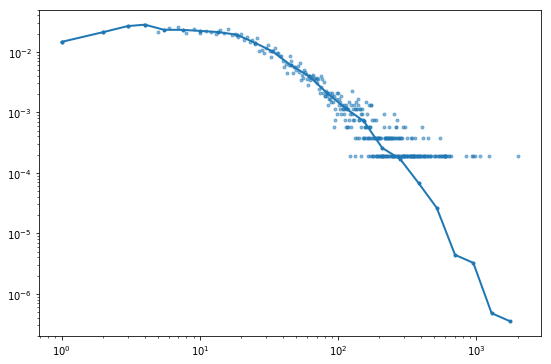

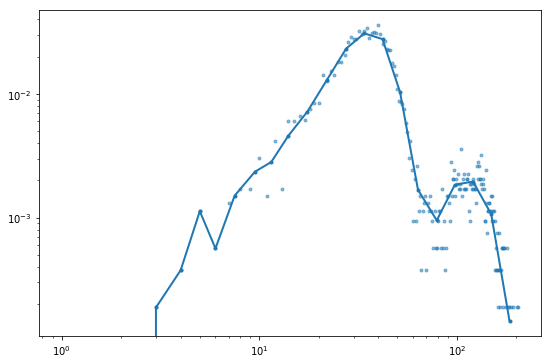

In [108]:
DiG = nx.DiGraph()
DiG.add_edges_from(qwe_list)

def plot_degrees(in_degree, label=None, color='C0', markersize=3):
    global zeta
    plot_distribution(
        *degree_distribution(in_degree),
        fmt='o', c=color, markersize=markersize
    )
    plot_distribution(
        *log_binning(in_degree, 25),
        fmt='o-', c=color, markersize=markersize,
        plt_type='log', label=label
    )
    return

plt_rescale = lambda scale=1.5: plt.gcf().set_size_inches(scale*np.array(plt.gcf().get_size_inches()))

# plot_degrees()
# [v for v in DiG.in_degree(data=True)][:10]

plot_degrees([d for n, d in DiG.in_degree()])
plt_rescale()
plt.show()
plot_degrees([d for n, d in DiG.out_degree()])
plt_rescale()
plt.show()

In [109]:
source_target_dict = {}
for source, target, _ in qweqwe:
    if source not in source_target_dict:
        source_target_dict[source] = [target]
    else:
        source_target_dict[source] += [target]

### Network Prediction

In [110]:
new_complex_targets[new_complex_targets.apply(lambda row: (
    row.Source in source_target_dict and
    len(row.Target_NF_in_SOURCES&set(source_target_dict[row.Source])) == 1 and
    row.Weight > 1
), axis=1)].sort_values(by='Weight', ascending=False)

,Phrase,Source,Source_POS,Target,Target_NF,Target_NF_POS_case,Target_NF_in_SOURCES,Weight
17639,[дома],крыша,{NOUN},дома,"{дома, дом}","{(дом, NOUN, nomn), (дома, ADVB, None), (дом, ...","{дома, дом}",147
13424,[души],зеркало,{NOUN},души,"{душить, душ, душа}","{(душ, NOUN, nomn), (душить, VERB, None), (душ...","{душ, душа}",146
15153,"[в, море]",капля,{NOUN},море,"{мора, море, мор}","{(мор, NOUN, loct), (мора, NOUN, loct), (море,...","{мор, море}",143
40607,[соску],сосать,{INFN},соску,"{соска, сосок}","{(сосок, NOUN, datv), (соска, NOUN, accs)}",{соска},131
19752,[времени],машина,{NOUN},времени,"{время, временить}","{(время, NOUN, datv), (время, NOUN, loct), (вр...",{время},125
7452,[мира],голубь,{NOUN},мира,"{миро, мир}","{(миро, NOUN, gent), (миро, NOUN, accs), (миро...",{мир},108
4334,[машины],владелец,{NOUN},машины,"{машина, машин}","{(машина, NOUN, accs), (машина, NOUN, nomn), (...",{машина},102
32970,"[в, гости]",приезжать,{INFN},гости,"{гостить, гость}","{(гость, NOUN, nomn), (гостить, VERB, None)}",{гость},93
43636,[души],терзание,{NOUN},души,"{душить, душ, душа}","{(душ, NOUN, nomn), (душить, VERB, None), (душ...","{душ, душа}",87
16603,[дело],кончить,{INFN},дело,"{дело, деть}","{(деть, VERB, None), (дело, NOUN, accs), (дело...",{дело},86


In [111]:
print('\n'.join(list(new_complex_targets[new_complex_targets.apply(lambda row: (
    row.Source in source_target_dict and
    len(row.Target_NF_in_SOURCES&set(source_target_dict[row.Source])) == 1 and
    row.Weight > 1
), axis=1)].apply(lambda row: (
    '{} {}: {}'.format(row.Source, ' '.join(row.Phrase), list(row.Target_NF_in_SOURCES&set(source_target_dict[row.Source]))[0])
), axis=1))))

абзац начало: начало
ад и рай: рай
адрес мой: мой
адрес дома: дом
америка открыта: открытый
аромат духов: духи
аромат цветов: цветок
аромат цветы: цветок
баба толстая: толстый
бабочка крыло: крыло
бабушка пироги: пирог
балда и поп: поп
балка потолок: потолок
банка варенья: варенье
банка из-под варенья: варенье
банка с вареньем: варенье
бант на голове: голова
баран животное: животный
баран горы: гора
баран и ворота: ворота
бардак дома: дом
баркас в море: море
батарейка для часов: часы
башня замок: замок
бегать утром: утро
бегать дорога: дорога
бегать по лесу: лес
беда прошла: пройти
бедность не порок: порок
бедствовать зимой: зима
бежать дорога: дорога
бежать лес: лес
бежать от самого себя: сам
безусловно прав: правый
берег мой: мой
беречь как зеницу ока: око
беседа чай: чай
бесконечность времени: время
бесплатно даром: дар
беспорядок дома: дом
бессмертие души: душа
бесценный дорогой: дорогой
билет дорогой: дорога
бисмарк политик: политика
блаженство в раю: рай
близко стоит: стоять
близ

In [112]:
predict_freq_cases_file = open('predict_freq_cases.txt')
predict_freq_cases = dict((lambda pair: (
    (pair[0].split(' ')[0], tuple(pair[0].split(' ')[1:])), pair[1]
))(p.split(':')) for p in predict_freq_cases_file.read().split('\n'))
predict_freq_cases_file.close()

In [113]:
predict_complex_cases_dict = {
    ('договориться', ('с', 'ним')): 'он',
    ('дочь', ('его',)): 'его',
    ('метро', ('им', 'ленина')): 'имя',
    ('пройтись', ('с', 'ним')): 'он',
    ('разговаривать', ('с', 'ним')): 'он',
    ('следовать', ('за', 'ним')): 'он',
    ('спина', ('его',)): 'его',
    ('теперь', ('уже',)): 'уже',
    ('теперь', ('уже', 'поздно')): 'уже',
    ('черт', ('с', 'ним')): 'он'
}

PREDICT_TARGETS_in_SOURCES = dict(
    list(
        new_complex_targets[new_complex_targets.apply(lambda row: (
            row.Source in source_target_dict and
            len(row.Target_NF_in_SOURCES&set(source_target_dict[row.Source])) == 1 and
            row.Weight > 1 and
            (row.Source, tuple(row.Phrase)) not in predict_freq_cases
        ), axis=1)].apply(lambda row: (
            (row.Source, tuple(row.Phrase)),
            list(row.Target_NF_in_SOURCES&set(source_target_dict[row.Source]))[0]
        ), axis=1)
    ) + list(
        new_complex_targets[new_complex_targets.apply(lambda row: (
            row.Source in source_target_dict and
            len(row.Target_NF_in_SOURCES&set(source_target_dict[row.Source])) == 1 and
            row.Weight > 1 and
            (row.Source, tuple(row.Phrase)) in predict_freq_cases and
            len(row.Target_NF_in_SOURCES - set(source_target_dict[row.Source])) > 0
        ), axis=1)].apply(lambda row: (
            (row.Source, tuple(row.Phrase)),
            (
                list(row.Target_NF_in_SOURCES - set(source_target_dict[row.Source]))[0]
                if len(row.Target_NF_in_SOURCES - set(source_target_dict[row.Source])) == 1
                else predict_complex_cases_dict[(row.Source, tuple(row.Phrase))]
            )
        ), axis=1)
    )
)

In [114]:
for key, value in PREDICT_TARGETS_in_SOURCES.items():
    if type(value) == list:
        PREDICT_TARGETS_in_SOURCES[key] = value[0]

In [115]:
assoc_net2['PREDICT_TARGETS_in_SOURCES'] = assoc_net2.apply(lambda row: [
    PREDICT_TARGETS_in_SOURCES[(row.Source, tuple(row['Target words']))]
] if (row.Source, tuple(row['Target words'])) in PREDICT_TARGETS_in_SOURCES else [], axis=1)

In [116]:
new_complex_targets = new_complex_targets[new_complex_targets.apply(lambda row: not (
    row.Source in source_target_dict and
    len(row.Target_NF_in_SOURCES&set(source_target_dict[row.Source])) == 1 and
    row.Weight > 1
), axis=1)]

In [117]:
len(new_complex_targets)

20023

### update network

In [118]:
qweqwe = [
    (row[0], target, row[2]/len(row[1]))
    for row in 
    assoc_net2[
        assoc_net2.Source.apply(lambda s: s in CLEAN_SOURCES)
    ].apply(lambda row: (
        row.Source,
        row['Target in Sources'] + row['Preps in Sources'] + 
        row['not Grnds in Sources'] + row['ADJF_NOUN in Sources'] + 
        row['NOUN_NOUN in Sources'] + row['ADVB in Sources'] + 
        row['ADJF in Sources'] + row['NOUN_ADJF in Sources'] +
        row['ADVB_ADJS_in_SOURCES'] + row['PREP_NOUN_in_SOURCES'] +
        row['not_PREP_CONJ_PRCL_in_SOURCES'] + row['PRTF_in_SOURCES'] +
        row['PREDICT_TARGETS_in_SOURCES'],
        row.Weight
    ), axis=1)
    for target in row[1]
]

qweqweqwe = dict()
for s, t, w in qweqwe:
    if (s, t) not in qweqweqwe:
        qweqweqwe[(s, t)] = 0
    qweqweqwe[(s, t)] += w
qwe_list = [(*key, {'weight': value}) for key, value in qweqweqwe.items()]

In [119]:
set([s for s, t, _ in qweqwe]) - set([t for s, t, _ in qweqwe])

{'аннулировать',
 'бита',
 'боже',
 'больная',
 'былое',
 'важнейший',
 'вдовый',
 'верхом',
 'взаимозависимость',
 'возмещать',
 'волоком',
 'вон',
 'восхищаться',
 'всего',
 'второй',
 'высочайший',
 'высший',
 'главнейший',
 'глубочайший',
 'дай',
 'даром',
 'деньги',
 'десятый',
 'длиннейший',
 'добрейший',
 'доспехи',
 'древнейший',
 'жаль',
 'жаркое',
 'известнейший',
 'интереснейший',
 'их',
 'контрольная',
 'крупнейший',
 'лидерство',
 'лучший',
 'любимая',
 'мельчайший',
 'метан',
 'наилучший',
 'наихудший',
 'наставить',
 'необходимо',
 'нижайший',
 'ничего',
 'новейший',
 'овощи',
 'оказываться',
 'оковы',
 'первый',
 'пересуды',
 'повести',
 'поить',
 'ползком',
 'полнейший',
 'полон',
 'постигнуть',
 'потом',
 'початок',
 'почти',
 'пренебрегать',
 'привыкнуть',
 'простейший',
 'пятый',
 'расплачиваться',
 'ребятенок',
 'свое',
 'святая',
 'сгущать',
 'семейка',
 'семнадцатый',
 'скорая',
 'слабейший',
 'сопли',
 'старейший',
 'стихи',
 'тишайший',
 'третий',
 'умнейший',


In [120]:
set([t for s, t, _ in qweqwe]) - set([s for s, t, _ in qweqwe])

{'былой',
 'газировать',
 'деньга',
 'должный',
 'доспех',
 'заведовать',
 'захватывать',
 'здравый',
 'контрольный',
 'окова',
 'пересуд',
 'полировать',
 'постичь',
 'потрясать',
 'разомкнуть',
 'раскалить',
 'семнадцать',
 'сопля'}

In [121]:
SOURCES - CLEAN_SOURCES

{'без',
 'бы',
 'было',
 'в',
 'вместо',
 'вот',
 'газированный',
 'говорят',
 'да',
 'давай',
 'даже',
 'дайте',
 'дальше',
 'для',
 'до',
 'должен',
 'если',
 'за',
 'заведующий',
 'завершающий',
 'законченный',
 'захватывающий',
 'здраво',
 'и',
 'из',
 'именно',
 'к',
 'конечно',
 'криво',
 'лучше',
 'между',
 'может',
 'на',
 'над',
 'не',
 'ни',
 'но',
 'ну',
 'о',
 'от',
 'по',
 'пожалуйста',
 'полированный',
 'потрясающий',
 'пусть',
 'рад',
 'разомкнутый',
 'раньше',
 'раскаленный',
 'с',
 'свято',
 'себе',
 'скорее',
 'стоп',
 'то',
 'только',
 'у',
 'ура',
 'фу'}

### ???

In [123]:
new_complex_targets[new_complex_targets.Weight > 1][[
    'Source', 'Phrase', 'Target', 'Target_NF', 'Target_NF_in_SOURCES', 'Weight', 'Source_POS'
]].sort_values(by='Weight', ascending=False)

,Source,Phrase,Target,Target_NF,Target_NF_in_SOURCES,Weight,Source_POS
28695,пить,[воду],воду,"{вода, вод}",{вода},135,{INFN}
38075,сделать,[дело],дело,"{дело, деть}",{дело},133,{INFN}
10934,ездить,[верхом],верхом,"{верхом, верх}","{верхом, верх}",130,{INFN}
9009,делать,[дело],дело,"{дело, деть}",{дело},113,{INFN}
34841,путь,[дорога],дорога,"{дорога, дорогой}","{дорога, дорогой}",108,{NOUN}
4612,водить,[машину],машину,"{машина, машин}",{машина},108,{INFN}
32203,появиться,"[на, свет]",свет,"{свет, света}","{свет, света}",97,{INFN}
11427,желать,[счастья],счастья,"{счастие, счастье}",{счастье},90,{INFN}
5699,вспоминать,[прошлое],прошлое,"{прошлый, прошлое}","{прошлый, прошлое}",69,{INFN}
4764,возить,[воду],воду,"{вода, вод}",{вода},68,{INFN}


In [124]:
DiG = nx.DiGraph()
DiG.add_edges_from(qwe_list)

nx.density(DiG)

0.008907639406474122

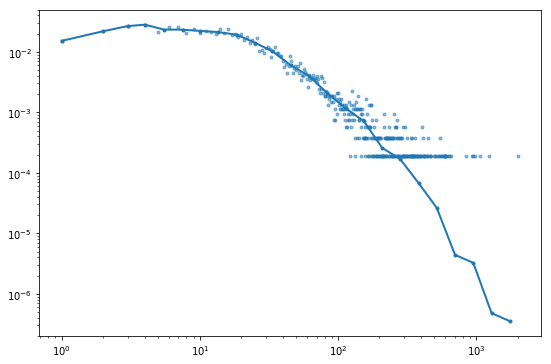

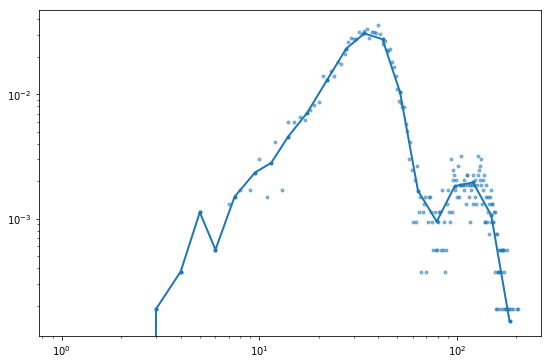

In [128]:
plot_degrees([d for n, d in DiG.in_degree()])
plt_rescale()
plt.show()
plot_degrees([d for n, d in DiG.out_degree()])
plt_rescale()
plt.show()

### ...

## statistics

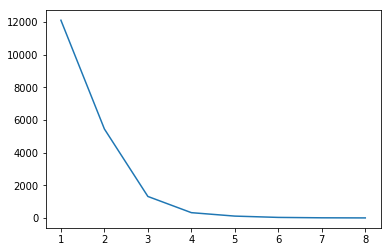

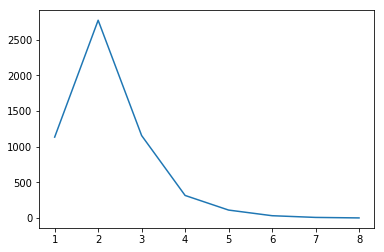

In [437]:
import matplotlib.pyplot as plt

# количество неразобранных источник+фраза с n + 1 словом
plt.plot(*np.unique(
    list(map(lambda s: len(s.split(' ')) - 1, set(new_complex_targets.apply(
        lambda row: '{} {}'.format(row.Source, ' '.join(row.Phrase)), axis=1
    ).tolist()))),
    return_counts=1
))
plt.show()

# количество неразобранных фраз с n словами
plt.plot(*np.unique(
    list(map(lambda s: len(s.split(' ')), set(new_complex_targets.Phrase.apply(' '.join)))),
    return_counts=1
))
plt.show()

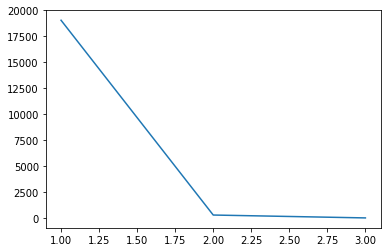

In [438]:
# количество фраз, в которых непонятно n слов
plt.plot(*np.unique(np.unique(
    list(map(lambda pair: pair[0], set(new_complex_targets.apply(
        lambda row: ('{} {}'.format(row.Source, ' '.join(row.Phrase)), row.Target), axis=1
    ).tolist()))), axis=0, return_counts=True
)[1], return_counts=True))
plt.show()

In [439]:
# total count
display(sorted(list(zip(*np.unique(
    list(map(
        lambda t: tuple(sorted(get_pos(t))),
        new_complex_targets.Target.tolist()
    )), return_counts=True
)[::-1])), key=lambda t: -t[0])[:10])

# uniq count
display(sorted(list(zip(*np.unique(
    list(map(
        lambda t: tuple(sorted(get_pos(t))),
        set(new_complex_targets.Target.tolist())
    )), return_counts=True
)[::-1])), key=lambda t: -t[0])[:10])

[(6387, ('NOUN',)),
 (4061, ('NOUN', 'VERB')),
 (1225, ('ADJS', 'NOUN')),
 (1176, ('ADVB', 'NOUN')),
 (816, ('ADJF', 'NOUN')),
 (507, ('ADJF', 'VERB')),
 (473, ('ADJF', 'NPRO')),
 (467, ('ADJS', 'PRTS')),
 (381, ('INFN', 'INTJ', 'VERB')),
 (381, ('VERB',))]

[(615, ('NOUN',)),
 (257, ('NOUN', 'VERB')),
 (89, ('ADJS', 'NOUN')),
 (89, ('ADJS', 'PRTS')),
 (55, ('ADJF', 'NOUN')),
 (45, ('ADVB', 'NOUN')),
 (41, ('VERB',)),
 (34, ('ADJS', 'VERB')),
 (15, ('ADJF', 'NPRO')),
 (13, ('COMP', 'NOUN'))]